# Insurance price prediction using ANN
## our aim is to build ANN regression deep learning model to predict price of insurance.
## we will not focus to improve model accuracy ,but to build ANN architecture.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [162]:
df = pd.read_csv(r'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [164]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [165]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [166]:
# we have some object features will use encoding for that
df.head()
df = pd.get_dummies(df,columns= ['region'], drop_first=True,dtype = int)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


In [167]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [168]:
df['sex'].replace({'male': 1, 'female': 0}, inplace=True)

In [169]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [170]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int32  
 7   region_southeast  1338 non-null   int32  
 8   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 78.5 KB


In [172]:
# split data
x = df.drop(columns= ['charges'], axis = 1)
y = df.charges

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled[0]

array([-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
       -0.56641788, -0.61132367,  1.76548098])

In [173]:
x_train, x_test, y_train , y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=22)

In [174]:
x_train.shape

(1003, 8)

In [175]:
x_test.shape

(335, 8)

In [176]:
y_train.shape

(1003,)

In [177]:
y_test.shape

(335,)

In [178]:
# building ANN
model = Sequential()
model.add(Dense(64, activation= 'sigmoid', input_dim = 8))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                576       
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.compile( loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])

In [180]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.1)

Epoch 1/100
14/15 [===========================>..] - ETA: 0s - loss: 164912864.0000 - accuracy: 0.0000e+00

15/15 [==============================] - 1s 29ms/step - loss: 164868576.0000 - accuracy: 0.0000e+00 - val_loss: 88918928.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 96454968.0000 - accuracy: 0.0000e+00 - val_loss: 59490100.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 68282312.0000 - accuracy: 0.0000e+00 - val_loss: 46569072.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 54561208.0000 - accuracy: 0.0000e+00 - val_loss: 45636908.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 51229232.0000 - accuracy: 0.0000e+00 - val_loss: 44550124.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 51926892.0000 - accuracy: 0.0000e+00 - val_loss: 54128408.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [=============

In [181]:
y_pred = model.predict(x_test)

11/11 [==============================] - 0s 3ms/step


In [182]:
r2_score(y_test,y_pred)

0.7211557906084105

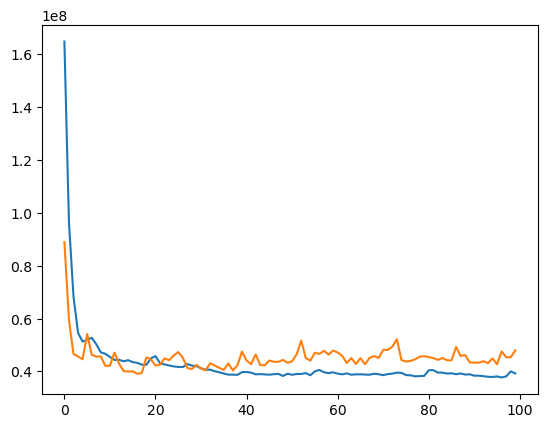

In [183]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])